<a href="https://colab.research.google.com/github/nihal-rao/detectron2_experiments/blob/master/Hand_mobilenet_FPN_RPN_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install detectron2

In [0]:
# install dependencies: (use cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 24kB/s 
     |████████████████████████████████| 4.1MB 34.9MB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0
     |████████████████████████████████| 276kB 28.5MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=036ec285e06d19a91dafe057adf24e14856de2be2e6cb27a9785ff2116cb7a1d
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-ziqij1pk
  Running command git

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()


  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=9c387a9e8d46a1115efaa59e4c4016021abef2d622ac8ca16cfbb23a4fd43609
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.7 GB  |     Proc size: 288.1 MB
GPU RAM Free: 7611MB | Used: 0MB | Util   0% | Total     7611MB


In [0]:
!pip uninstall detectron2

In [0]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.2MB 2.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.dev200408-cp36-none-any.whl size=38766 sha256=34e36d4a22c34bb13692194e99202e5b8cccfcb1ea9d5c0745eaeed3e53672dd
  Stored in directory: /root/.cache/pip/wheels/f4/0e/47/26bf800646b2132b8da459615a0366162ab3380306d3849b7b
Successfully built fvcore


In [0]:
import shutil
source = "/content/drive/My Drive/configs/mobilenet.py"
dest='/usr/local/lib/python3.6/dist-packages/detectron2/modeling/backbone/mobilenet.py'
shutil.copyfile(source,dest)

'/usr/local/lib/python3.6/dist-packages/detectron2/modeling/backbone/mobilenet.py'

In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Load data

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
from detectron2.data.datasets import register_coco_instances
import os
import numpy as np
import json
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog

register_coco_instances("ego_train", {}, "/content/drive/My Drive/egohands/instances_hands_train2020.json", "/content/drive/My Drive/egohands/train_images")
register_coco_instances("ego_val", {}, "/content/drive/My Drive/egohands/instances_hands_test2020.json", "/content/drive/My Drive/egohands/test_images")

rpc_train_metadata = MetadataCatalog.get("ego_train")
rpc_test_metadata = MetadataCatalog.get("ego_val")


[04/05 12:27:17 d2.data.datasets.coco]: Loaded 600 images in COCO format from /content/drive/My Drive/egohands/instances_hands_test2020.json


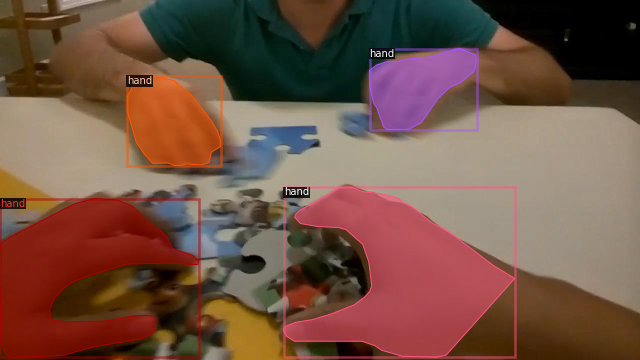

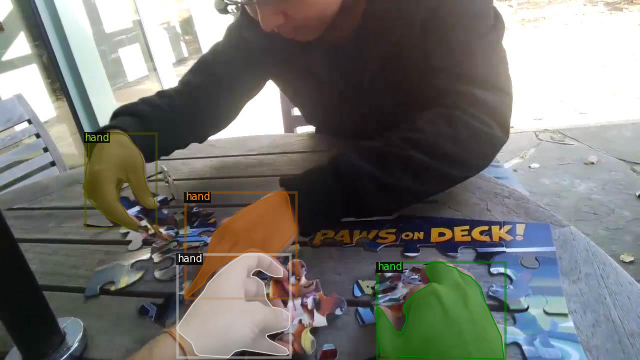

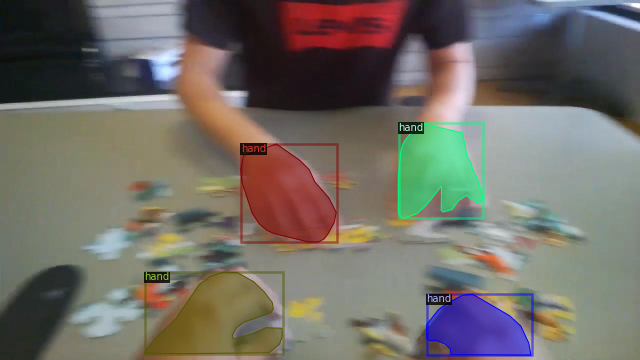

In [0]:
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get("ego_val")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=rpc_val_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

## Train

In [0]:
import torch 
import detectron2.utils.comm as comm

class ValidationLoss(detectron2.engine.HookBase):
    def __init__(self, config):
        super(ValidationLoss, self).__init__()
        self.cfg = config.clone()
        self.cfg.DATASETS.TRAIN = config.DATASETS.VAL
        self._loader = iter(detectron2.data.build_detection_train_loader(self.cfg))

    def after_step(self):
      batch =  next(self._loader) 
      with torch.no_grad():
        loss_dict = self.trainer.model(batch)
        loss_dict_reduced = {"val_" + k: v.item() for k, v in 
                                 comm.reduce_dict(loss_dict).items()}
        losses_reduced = sum(loss for loss in loss_dict_reduced.values())
        if comm.is_main_process():
          self.trainer.storage.put_scalars(total_val_loss=losses_reduced, 
                                                 **loss_dict_reduced)     


In [0]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file("/content/drive/My Drive/configs/RPN_Mv2_FPNLite_3x.yaml")
cfg.DATASETS.TRAIN = ("ego_train",)
cfg.DATASETS.VAL = ("ego_val",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/rpn_R_50_FPN_1x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 6

cfg.SOLVER.BASE_LR = 0.008013506410491608 # pick a good LR
#cfg.SOLVER.GAMMA = 0.5
#cfg.SOLVER.STEPS = (500,1000,2000,2500,3000,4000)
cfg.SOLVER.MAX_ITER = 4000  # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.SOLVER.WARMUP_ITERS = 0
cfg.MODEL.FPN.OUT_CHANNELS = 256
cfg.MODEL.RPN.IOU_THRESHOLDS = [0.4, 0.5]


cfg.OUTPUT_DIR = "./output" #0.008013506410491608

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
val_loss = ValidationLoss(cfg)  
trainer.register_hooks([val_loss])
# swap the order of PeriodicWriter and ValidationLoss
trainer._hooks = trainer._hooks[:-2] + trainer._hooks[-2:][::-1]
trainer.resume_or_load(resume=False)
trainer.train()

WARNING [04/08 15:07:17 d2.config.compat]: Config '/content/drive/My Drive/configs/RPN_Mv2_FPNLite_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[04/08 15:07:21 d2.engine.defaults]: Model:
ProposalNetwork(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(24, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(32, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(96, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(320, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): MobileNetV2(
      (features): ModuleList(
        (0): Sequentia

mobilenet_v2_detectron2.pth?dl=1: 9.08MB [00:01, 5.31MB/s]                            

[04/08 15:07:27 d2.engine.train_loop]: Starting training from iteration 0


[04/08 15:09:11 d2.utils.events]:  eta: 1:22:09  iter: 19  total_loss: 0.635  loss_rpn_cls: 0.309  loss_rpn_loc: 0.284  total_val_loss: 0.594  val_loss_rpn_cls: 0.290  val_loss_rpn_loc: 0.306  time: 1.7374  data_time: 2.8026  lr: 0.008014  max_mem: 6699M
[04/08 15:10:09 d2.utils.events]:  eta: 1:21:20  iter: 39  total_loss: 0.522  loss_rpn_cls: 0.241  loss_rpn_loc: 0.278  total_val_loss: 0.498  val_loss_rpn_cls: 0.215  val_loss_rpn_loc: 0.292  time: 1.5595  data_time: 0.7500  lr: 0.008014  max_mem: 6699M
[04/08 15:11:06 d2.utils.events]:  eta: 1:20:28  iter: 59  total_loss: 0.398  loss_rpn_cls: 0.125  loss_rpn_loc: 0.281  total_val_loss: 0.397  val_loss_rpn_cls: 0.117  val_loss_rpn_loc: 0.286  time: 1.5080  data_time: 0.7588  lr: 0.008014  max_mem: 6699M


In [0]:
# Look at training curves in tensorboard:
%reload_ext tensorboard
%tensorboard --logdir output

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:



In [0]:
#cfg.MODEL.WEIGHTS = "/content/drive/My Drive/mobilenet_fpn_rpn/model_final.pth"
cfg.MODEL.WEIGHTS ='/content/output/model_final.pth'
#cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9   #set the testing threshold for this model
cfg.DATASETS.TEST = ("ego_val", )
#cfg.MODEL.RPN.POST_NMS_TOPK_TEST = 2000
cfg.MODEL.RPN.POST_NMS_TOPK_TEST = 5
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
predictor = DefaultPredictor(cfg)

[04/07 08:42:51 d2.engine.defaults]: Model:
ProposalNetwork(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(24, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): MobileNetV2(
      (features): ModuleList(
        (0): Sequential(
          (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): FrozenBatchNorm2d(num_features=32, eps=1e-05)
          (2)

In [0]:
import shutil
shutil.copytree('/content/output', '/content/drive/My Drive/mobilenet_fpn_rpn')

'/content/drive/My Drive/mobilenet_fpn_rpn'

In [0]:
import datetime
import logging
import time
from collections import OrderedDict
from contextlib import contextmanager
import torch

from detectron2.structures.instances import Instances
from detectron2.utils.comm import is_main_process
from detectron2.utils.logger import log_every_n_seconds
from detectron2.evaluation import DatasetEvaluator,inference_context
import pdb

class DatasetEvaluators(DatasetEvaluator):
    def __init__(self, evaluators):
        super().__init__()
        self._evaluators = evaluators

    def reset(self):
        for evaluator in self._evaluators:
            evaluator.reset()

    def process(self, input, output):
        for evaluator in self._evaluators:
            evaluator.process(input, output)

    def evaluate(self):
        results = OrderedDict()
        for evaluator in self._evaluators:
            result = evaluator.evaluate()
            if is_main_process() and result is not None:
                for k, v in result.items():
                    assert (
                        k not in results
                    ), "Different evaluators produce results with the same key {}".format(k)
                    results[k] = v
        return results

def inference_on_dataset_mod(model, data_loader, evaluator):
    """
    Run model on the data_loader and evaluate the metrics with evaluator.
    Also benchmark the inference speed of `model.forward` accurately.
    The model will be used in eval mode.

    Args:
        model (nn.Module): a module which accepts an object from
            `data_loader` and returns some outputs. It will be temporarily set to `eval` mode.

            If you wish to evaluate a model in `training` mode instead, you can
            wrap the given model and override its behavior of `.eval()` and `.train()`.
        data_loader: an iterable object with a length.
            The elements it generates will be the inputs to the model.
        evaluator (DatasetEvaluator): the evaluator to run. Use `None` if you only want
            to benchmark, but don't want to do any evaluation.

    Returns:
        The return value of `evaluator.evaluate()`
    """
    num_devices = torch.distributed.get_world_size() if torch.distributed.is_initialized() else 1
    logger = logging.getLogger(__name__)
    logger.info("MODD Start inference on {} images".format(len(data_loader)))

    total = len(data_loader)  # inference data loader must have a fixed length
    if evaluator is None:
        # create a no-op evaluator
        evaluator = DatasetEvaluators([])
    evaluator.reset()

    num_warmup = min(5, total - 1)
    start_time = time.perf_counter()
    total_compute_time = 0
    with inference_context(model), torch.no_grad():
        for idx, inputs in enumerate(data_loader):
            if idx == num_warmup:
                start_time = time.perf_counter()
                total_compute_time = 0

            start_compute_time = time.perf_counter()
            outputs = model(inputs)
            l=outputs[0]["proposals"].objectness_logits.size()
            op = Instances(outputs[0]["proposals"]._image_size)
            op.pred_boxes=outputs[0]["proposals"].proposal_boxes
            op.scores=outputs[0]["proposals"].objectness_logits
            op.pred_classes=torch.zeros(l[0]).cuda()
            output_dict = {}
            output_dict["instances"]=op
            output_list = [output_dict]
            if torch.cuda.is_available():
                torch.cuda.synchronize()
            total_compute_time += time.perf_counter() - start_compute_time
            evaluator.process(inputs, output_list)

            iters_after_start = idx + 1 - num_warmup * int(idx >= num_warmup)
            seconds_per_img = total_compute_time / iters_after_start
            if idx >= num_warmup * 2 or seconds_per_img > 5:
                total_seconds_per_img = (time.perf_counter() - start_time) / iters_after_start
                eta = datetime.timedelta(seconds=int(total_seconds_per_img * (total - idx - 1)))
                log_every_n_seconds(
                    logging.INFO,
                    "Inference done {}/{}. {:.4f} s / img. ETA={}".format(
                        idx + 1, total, seconds_per_img, str(eta)
                    ),
                    n=5,
                )

    # Measure the time only for this worker (before the synchronization barrier)
    total_time = time.perf_counter() - start_time
    total_time_str = str(datetime.timedelta(seconds=total_time))
    # NOTE this format is parsed by grep
    logger.info(
        "Total inference time: {} ({:.6f} s / img per device, on {} devices)".format(
            total_time_str, total_time / (total - num_warmup), num_devices
        )
    )
    total_compute_time_str = str(datetime.timedelta(seconds=int(total_compute_time)))
    logger.info(
        "Total inference pure compute time: {} ({:.6f} s / img per device, on {} devices)".format(
            total_compute_time_str, total_compute_time / (total - num_warmup), num_devices
        )
    )
    #pdb.set_trace()
    results = evaluator.evaluate()
    # An evaluator may return None when not in main process.
    # Replace it by an empty dict instead to make it easier for downstream code to handle
    if results is None:
        results = {}
    return results

In [0]:
from detectron2.evaluation import COCOEvaluator
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("ego_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "ego_val")
inference_on_dataset_mod(predictor.model, val_loader, evaluator)